# Calculando el Silhouette Score

In [1]:
#Importamos las libreerías
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
#Generamos data aleatoria
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


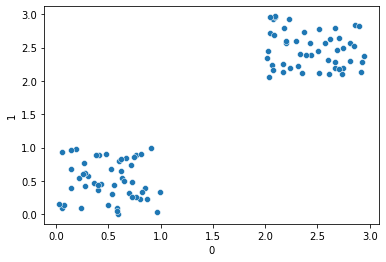

In [3]:
#Ploteamos
sns.scatterplot(Z[0],Z[1])

In [4]:
#Aplicamos K-Means con 2 clústers
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [11]:
label

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 0], dtype=int32)

In [5]:
#Calculamos el Índice de Silhouette
                                                #datos, #etiqueta (predict)
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8148567478576516


**Insight**

Podemos decir que los grupos están bien separados entre sí ya que la métrica de Silhouette nos arroja un resultado cercano a 1. Sin embargo, para comprobar si nuestra puntuación de silueta proporciona la información correcta o no, podemos crear otro diagrama de dispersión que muestre los puntos de datos etiquetados como se visualiza a continuación:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


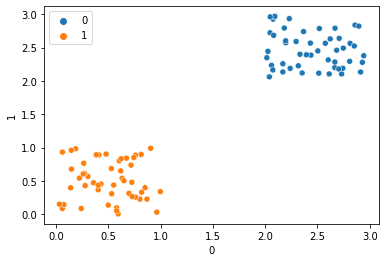

In [6]:
sns.scatterplot(Z[0],Z[1],hue=label)

Como podemos observar, se aprecia claramente en la figura anterior que cada grupo está muy separado entre sí. Esto significa que es de esperarse que el valor obtenido para el índice de Silhouette sea un valor cercano a 1. 

Probemos con 3 clúster a ver qué pasa ahora...

In [7]:
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)

In [8]:
#Calculamos el Índice de Silhouette
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')

Silhouette Score(n=3): 0.597277613806895


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


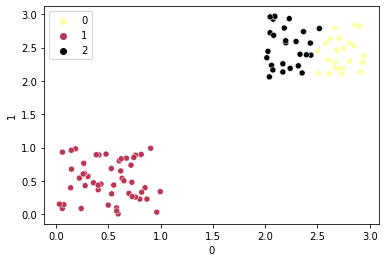

In [9]:
#Ploteamos
sns.scatterplot(Z[0],Z[1],hue=label,palette='inferno_r')

**Apreciaciones**

Como podemos observar de la figura anterior, los grupos no están bien separados. La distancia entre grupos entre el grupo 1 y el grupo 2 es casi insignificante. Por eso la puntuación de silueta para n = 3 es menor que la de n = 2.

Cuando se trata de dimensiones más altas, la puntuación de silueta es bastante útil para validar el funcionamiento del algoritmo de agrupamiento, ya que no podemos usar ningún tipo de visualización para validar el agrupamiento cuando las dimensiones son mayores que 3.

También podemos usar la puntuación de silueta para verificar el número óptimo de clústeres. En el ejemplo anterior, podemos decir que el número óptimo de clústeres es 2 ya que su puntuación de silueta es mayor que la de 3 clústeres.